Bike Sharing Assignment_Chethan BR - chethanbr86@gmail.com

### Importing Libraries

In [1]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

#importing numpy and pandas packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing statsmodel and sklearnfor linear regression
import statsmodels
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

#importing train_test_split for splitting into test and train datasets
import sklearn
from sklearn.model_selection import train_test_split

#importing scaling libraries for scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#importing RFE to filter the variables with prioroty
from sklearn.feature_selection import RFE

#importing VIF for checking VIF score
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

#importing r2_score to check R-squared value
from sklearn.metrics import r2_score

# for displaying the max col and row values
pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width',100)

### Reading the data

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Routine Checks

In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


#### <font color=green> There are no null values in the dataset.

In [5]:
df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Coverting columns as per Data Dictonary for Visualization

In [7]:
df = df.drop(['dteday','instant'],axis = 1)

col_list1 = ['yr']
def convert1(x):
    return x.map({0:2018,1:2019})
df[col_list1] = df[col_list1].apply(convert1)

col_list2 = ['season']
def convert2(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})
df[col_list2] = df[col_list2].apply(convert2)

col_list3 = ['weathersit']
def convert3(x):
    return x.map({1:'1_Clear',2:'2_Mist',3:'3_Snow',4:'4_Rain'})
    #return x.map({1:'Clear, Few clouds, Partly cloudy, Partly cloudy',2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})
df[col_list3] = df[col_list3].apply(convert3)

col_list4 = ['mnth']
def convert4(x):
    return x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df[col_list4] = df[col_list4].apply(convert4)

col_list5 = ['weekday']
def convert5(x):
    return x.map({0:'tue',1:'wed',2:'thu',3:'fri',4:'sat',5:'sun',6:'mon'})
df[col_list5] = df[col_list5].apply(convert5)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,jan,0,mon,0,2_Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,jan,0,tue,0,2_Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,jan,0,wed,1,1_Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,jan,0,thu,1,1_Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,jan,0,fri,1,1_Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Identifying Outliers

In [8]:
df.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

In [9]:
df.atemp.describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

In [10]:
df.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

In [11]:
df.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [12]:
df.casual.describe()

count     730.000000
mean      849.249315
std       686.479875
min         2.000000
25%       316.250000
50%       717.000000
75%      1096.500000
max      3410.000000
Name: casual, dtype: float64

In [13]:
df.registered.describe()

count     730.000000
mean     3658.757534
std      1559.758728
min        20.000000
25%      2502.250000
50%      3664.500000
75%      4783.250000
max      6946.000000
Name: registered, dtype: float64

In [14]:
df.cnt.describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

#### <font color=green> There doesn't seem to be any Outliers present in the dataset.

### Visualization of Dataframe

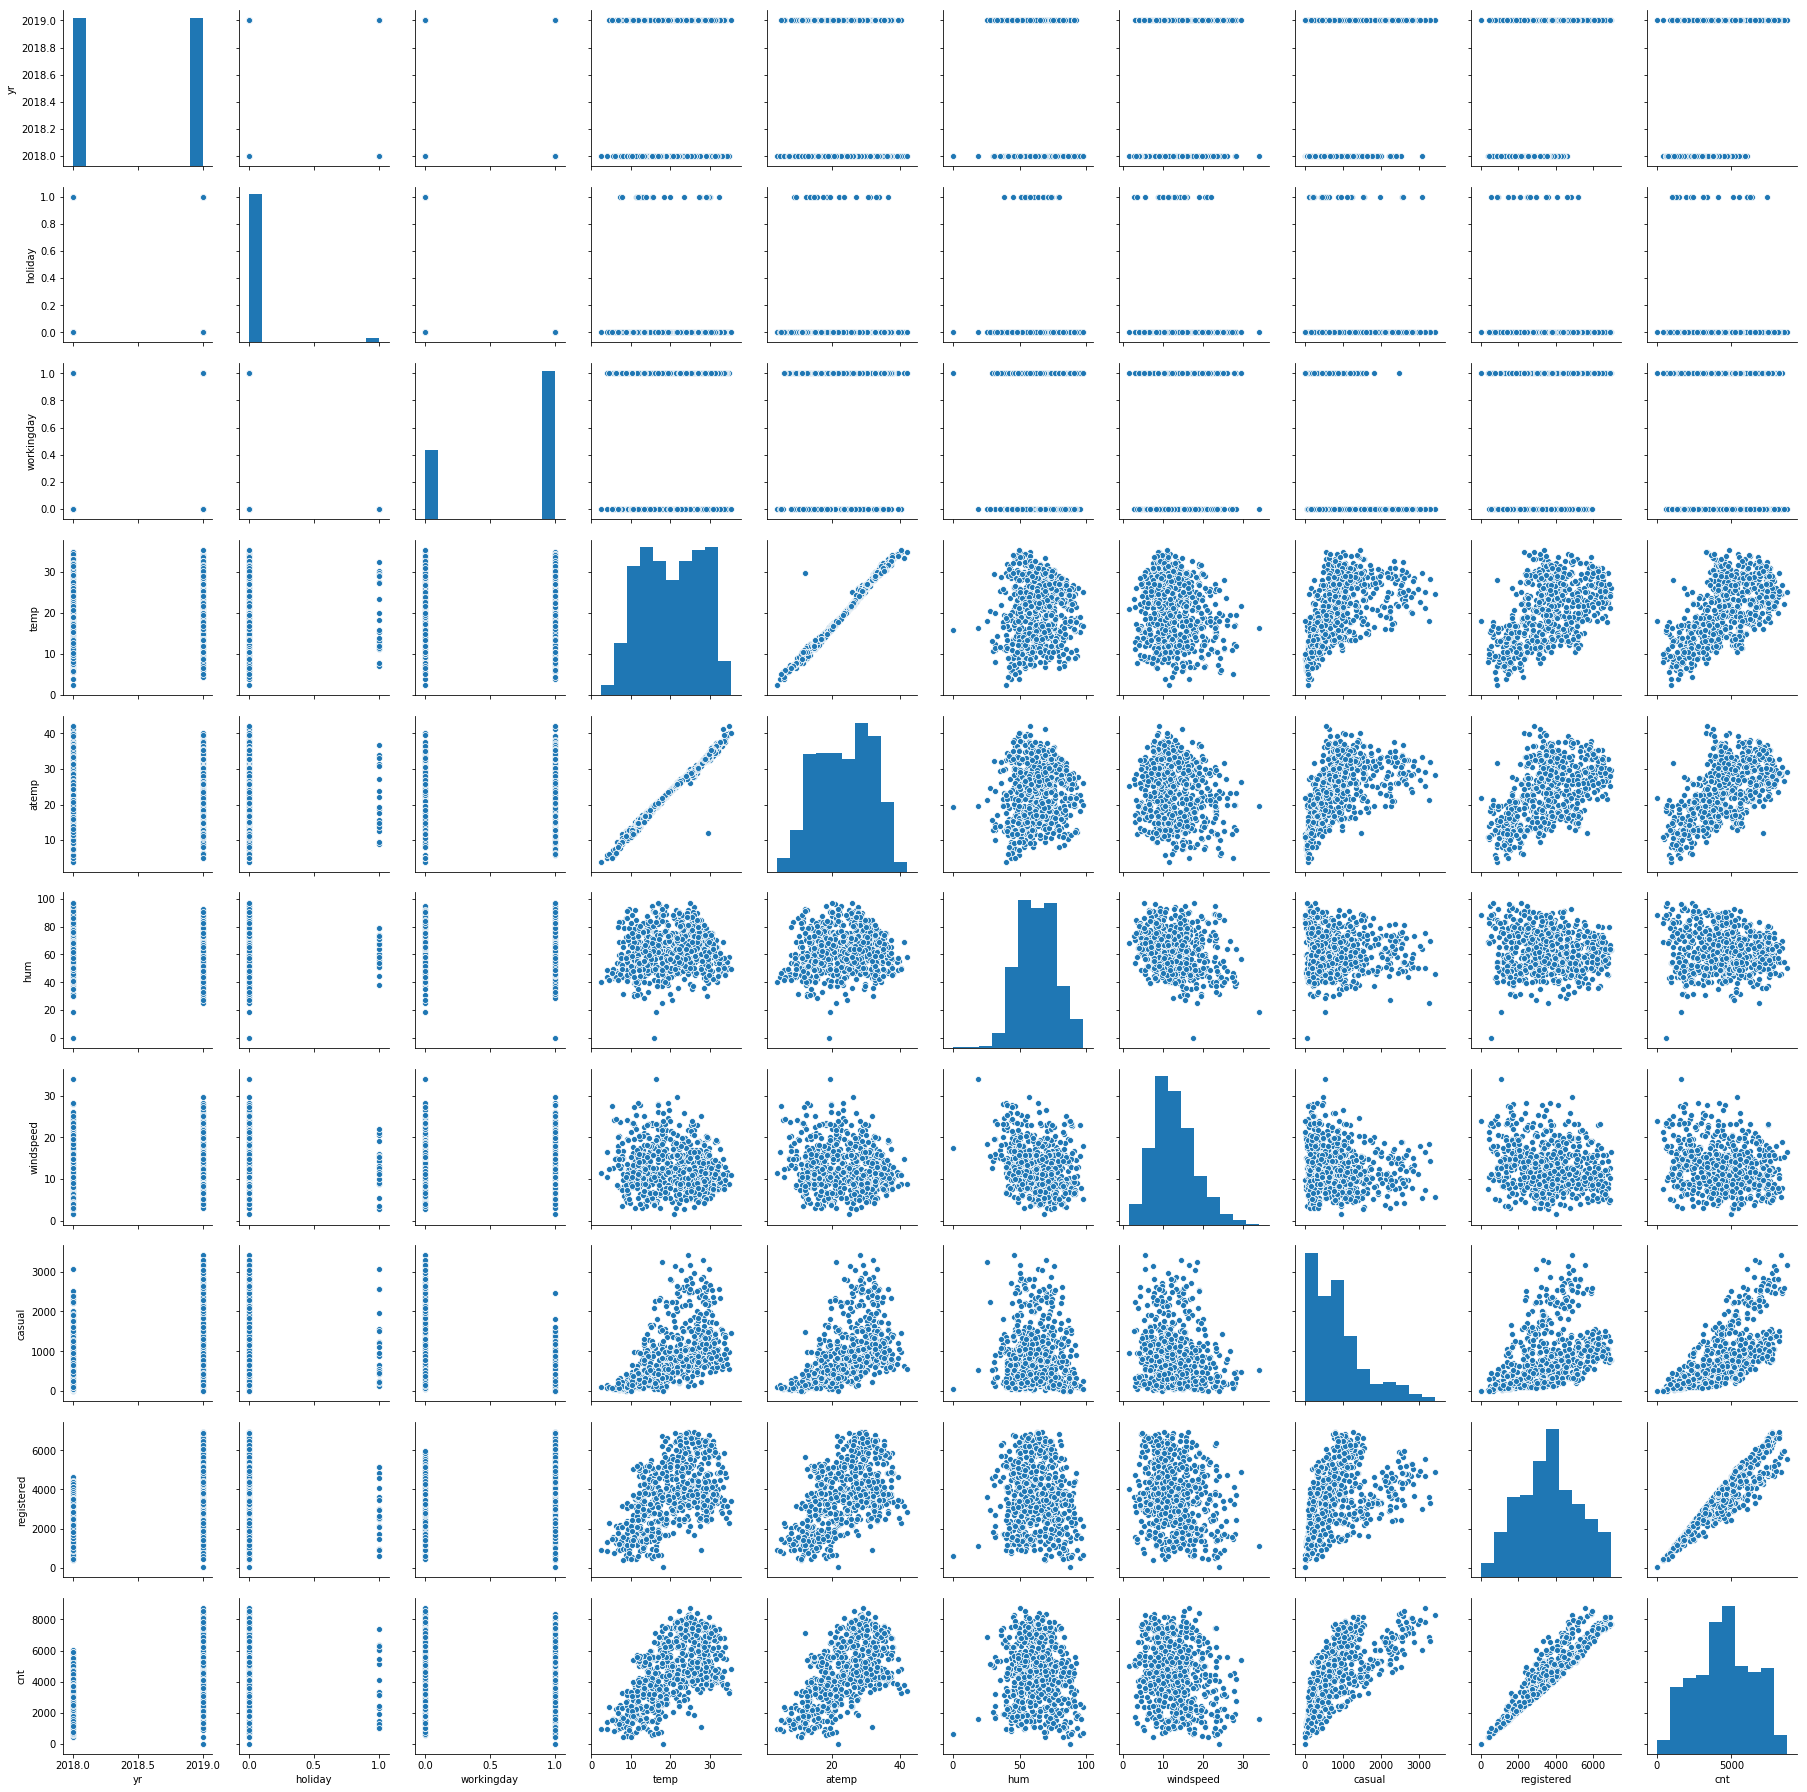

In [15]:
sns.pairplot(df)
plt.show()

#### <font color=green> From the pairplot we can see all sorts of relationship between variables.

<Figure size 720x864 with 0 Axes>

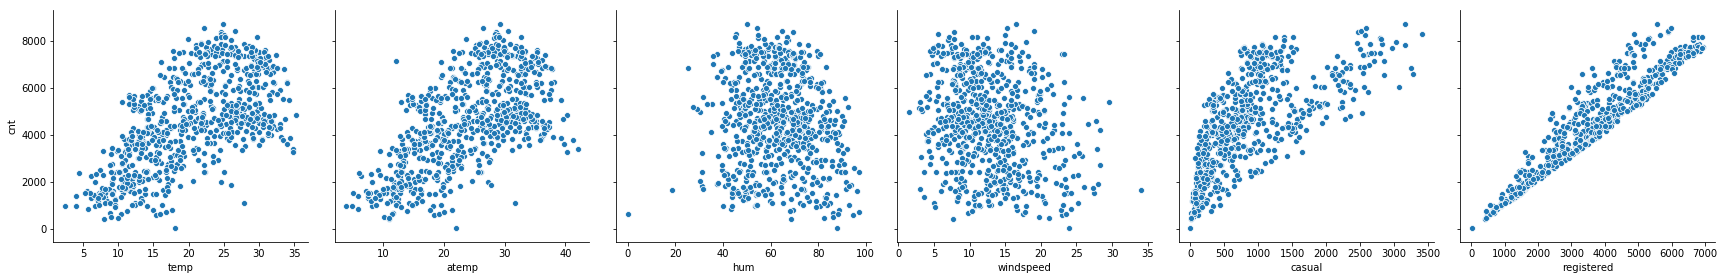

In [16]:
plt.figure(figsize=(10, 12))
sns.pairplot(df, x_vars=['temp','atemp','hum', 'windspeed','casual', 'registered'], y_vars='cnt',height=4, aspect=1, kind='scatter')
plt.show()

#### <font color=green> We can clearly see that how all columns have either a strong or a week relation with cnt.

### Heatmap showning correlation between variables

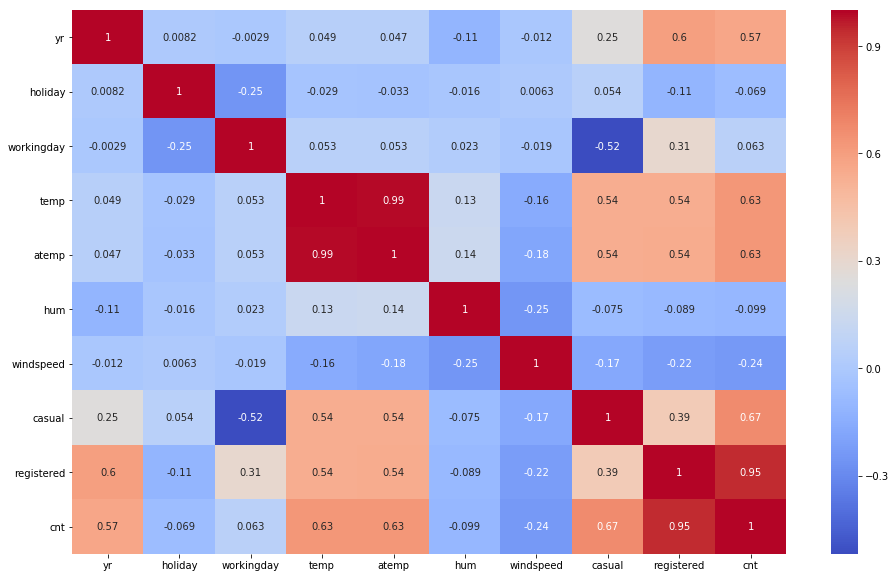

In [17]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot = True)
plt.show()

#### <font color=green> We can clearly see high correlation between some of the variables which might be redundant like cnt and registered, temp and atemp.

### Creating bins for univariate and bivariate analysis

In [18]:
bins=[0,5,15,25,35,40]
temp_group=['<5','5-15','15-25','25-35','>35']
df['temp_binned'] = pd.cut(df['temp'], bins, labels=temp_group)

In [19]:
bins=[0,5,15,25,35,50]
atemp_group=['<5','5-15','15-25','25-35','>35']
df['atemp_binned'] = pd.cut(df['atemp'], bins, labels=atemp_group)

In [20]:
bins=[0,20,40,60,80,100]
hum_group=['<20','20-40','40-60','60-80','>80']
df['hum_binned'] = pd.cut(df['hum'], bins, labels=hum_group)

In [21]:
bins=[0,5,15,25,35,40]
wind_group=['<5','5-15','15-25','25-35','>35']
df['wind_binned'] = pd.cut(df['windspeed'], bins, labels=wind_group)

In [22]:
bins=[0,1000,2000,3000,4000]
cas_group=['<1000','1000-2000','2000-3000','>4000']
df['cas_binned'] = pd.cut(df['casual'], bins, labels=cas_group)

In [23]:
bins=[0,1000,2000,3000,4000,5000,6000,7000]
reg_group=['<1000','1000-2000','2000-3000','4000-5000','5000-6000','6000-7000','>7000']
df['reg_binned'] = pd.cut(df['registered'], bins, labels=reg_group)

In [24]:
bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000]
cnt_group=['<1000','1000-2000','2000-3000','4000-5000','5000-6000','6000-7000','7000-8000','8000-9000','>9000']
df['cnt_binned'] = pd.cut(df['cnt'], bins, labels=cnt_group)

In [25]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_binned,atemp_binned,hum_binned,wind_binned,cas_binned,reg_binned,cnt_binned
0,spring,2018,jan,0,mon,0,2_Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,5-15,15-25,>80,5-15,<1000,<1000,<1000
1,spring,2018,jan,0,tue,0,2_Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,5-15,15-25,60-80,15-25,<1000,<1000,<1000
2,spring,2018,jan,0,wed,1,1_Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,5-15,5-15,40-60,15-25,<1000,1000-2000,1000-2000
3,spring,2018,jan,0,thu,1,1_Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,5-15,5-15,40-60,5-15,<1000,1000-2000,1000-2000
4,spring,2018,jan,0,fri,1,1_Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5-15,5-15,40-60,5-15,<1000,1000-2000,1000-2000


### Univariate Analysis

#### Categorical Variables

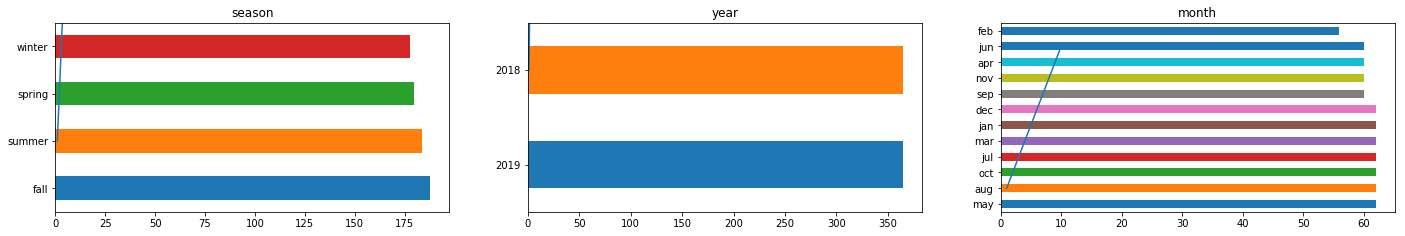

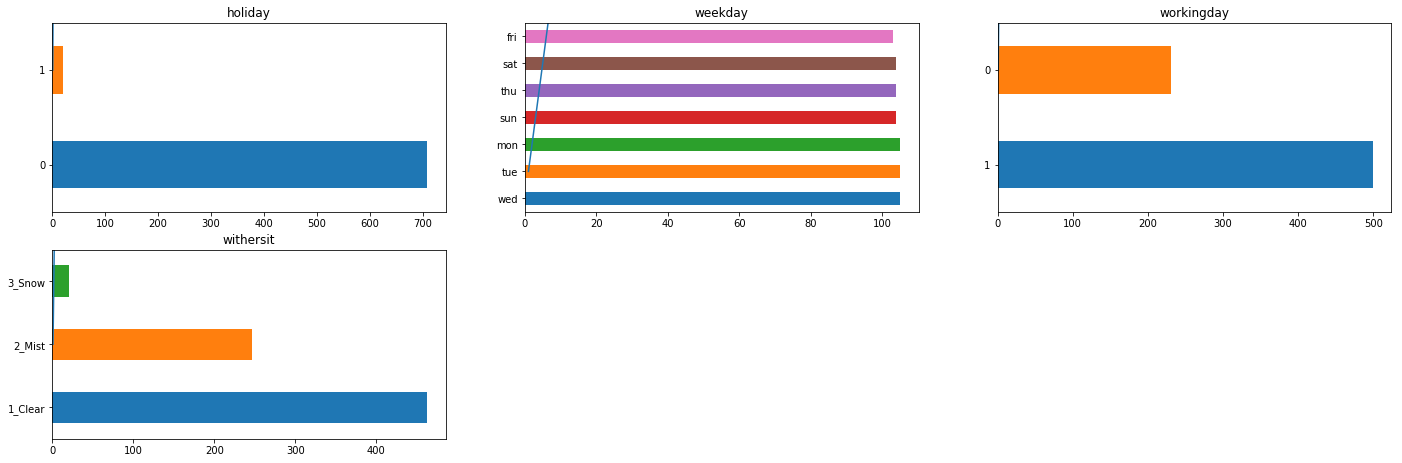

In [26]:
x = np.linspace(1, 10, 100)
plt.figure(figsize=(24,16))
plt.subplot(4,3,1)
df.season.value_counts().plot.barh()
plt.title("season")
plt.plot(x, x)
plt.subplot(4,3,2)
df.yr.value_counts().plot.barh()
plt.title("year")
plt.plot(x, x)
plt.subplot(4,3,3)
df.mnth.value_counts().plot.barh()
plt.title("month")
plt.plot(x, x)
plt.figure(figsize=(24,16))
plt.subplot(4,3,1)
df.holiday.value_counts().plot.barh()
plt.title("holiday")
plt.plot(x, x)
plt.subplot(4,3,2)
df.weekday.value_counts().plot.barh()
plt.title("weekday")
plt.plot(x, x)
plt.subplot(4,3,3)
df.workingday.value_counts().plot.barh()
plt.title("workingday")
plt.plot(x, x)
plt.subplot(4,3,4)
df.weathersit.value_counts().plot.barh()
plt.title("withersit")
plt.plot(x, x)
plt.show()

#### Continuous Variables

Text(0.5, 1.0, 'cnt')

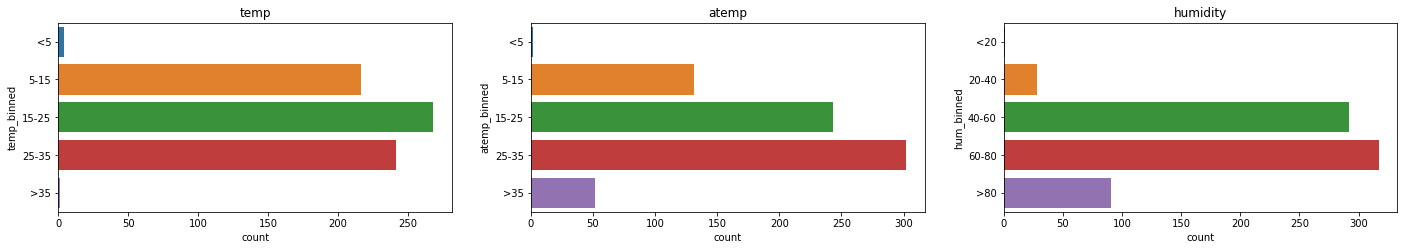

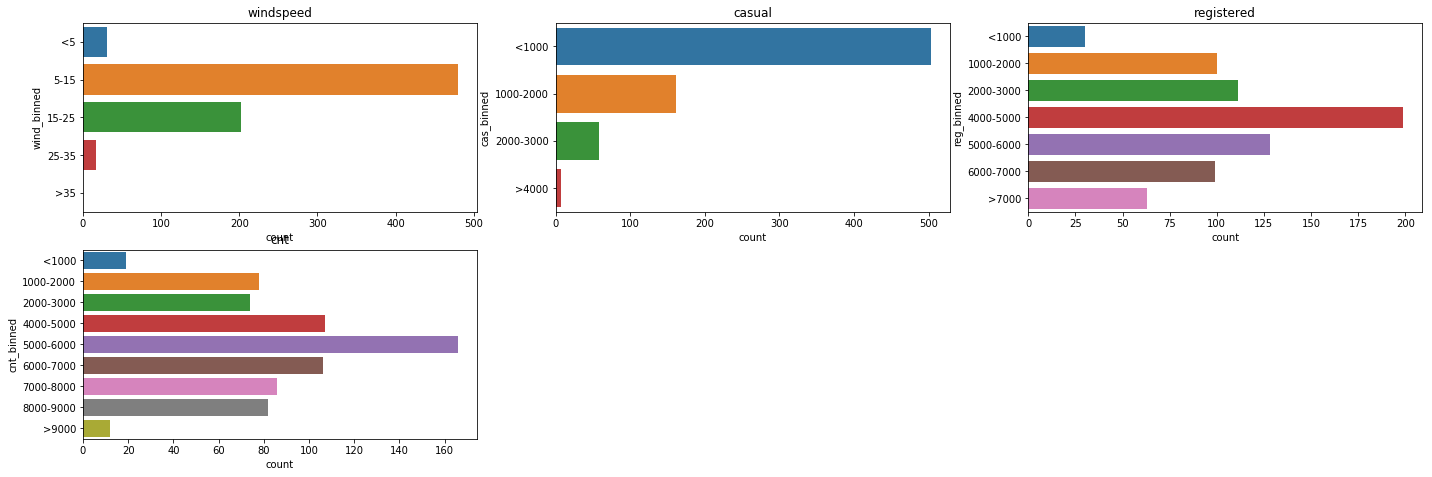

In [27]:
plt.figure(figsize=(24,16))
plt.subplot(4, 3, 1)
sns.countplot(y="temp_binned", data=df)
plt.title('temp')
plt.subplot(4, 3, 2)
sns.countplot(y="atemp_binned", data=df)
plt.title('atemp')
plt.subplot(4, 3, 3)
sns.countplot(y="hum_binned", data=df)
plt.title('humidity')
plt.figure(figsize=(24,16))
plt.subplot(4, 3, 1)
sns.countplot(y="wind_binned", data=df)
plt.title('windspeed')
plt.subplot(4, 3, 2)
sns.countplot(y="cas_binned", data=df)
plt.title('casual')
plt.subplot(4, 3, 3)
sns.countplot(y="reg_binned", data=df)
plt.title('registered')
plt.subplot(4, 3, 4)
sns.countplot(y="cnt_binned", data=df)
plt.title('cnt')

### Bivariate Analysis

#### Categorical Variables

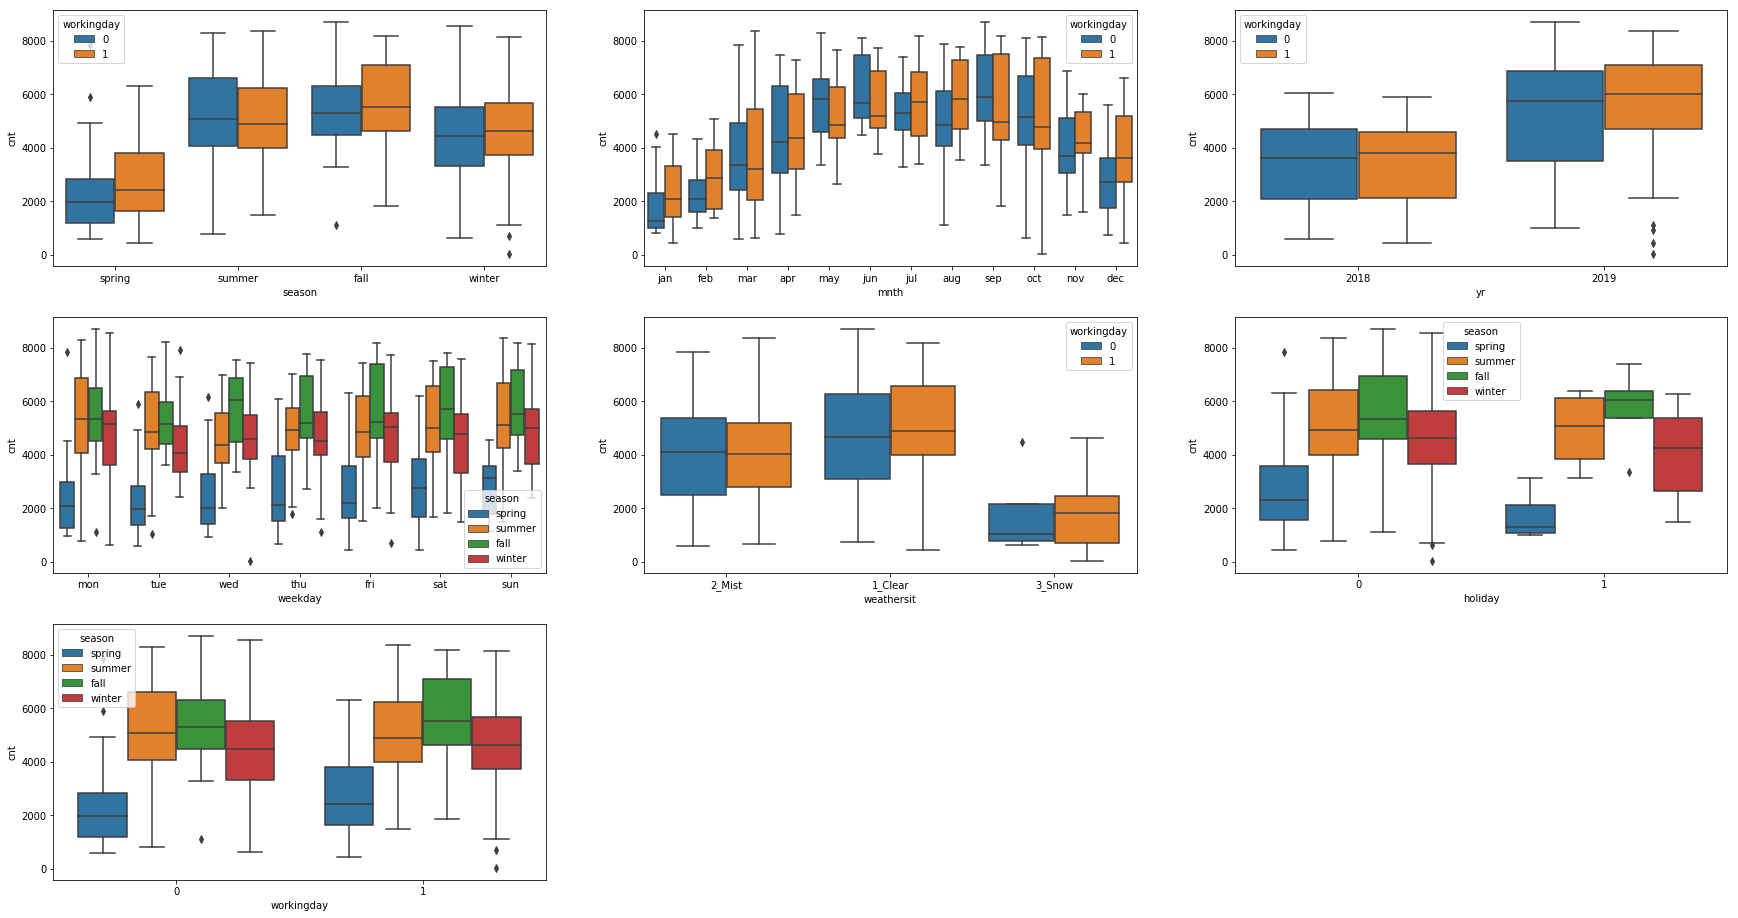

In [28]:
plt.figure(figsize=(30,16))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', hue="workingday", data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', hue="workingday", data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', hue="workingday", data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', hue="season", data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', hue="workingday", data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', hue="season", data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', hue="season", data = df)
plt.show()

#### Numerical Data

Text(0.5, 1.0, 'cnt')

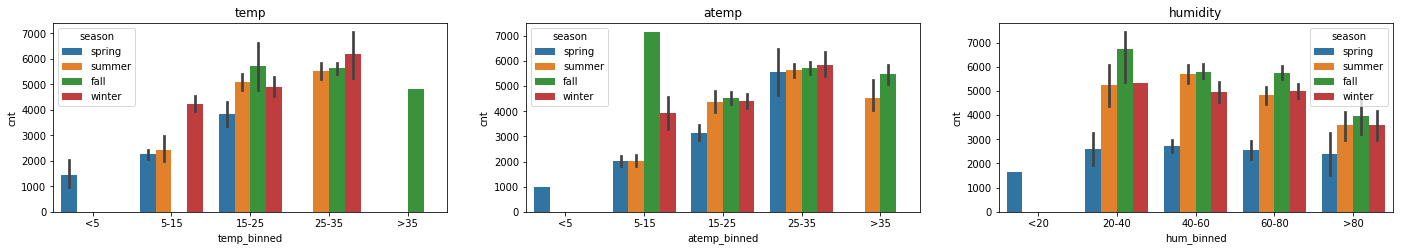

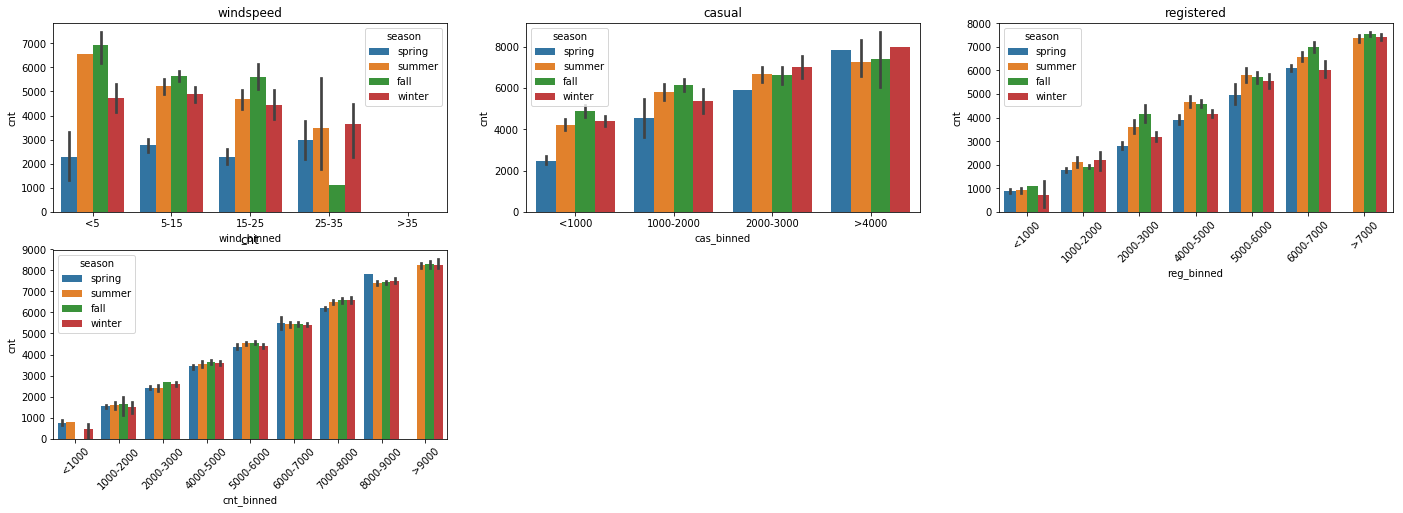

In [29]:
plt.figure(figsize=(24,16))
plt.subplot(4, 3, 1)
sns.barplot(x="temp_binned", y='cnt', hue='season', data=df)
plt.title('temp')
plt.subplot(4, 3, 2)
sns.barplot(x="atemp_binned", y='cnt', hue='season', data=df)
plt.title('atemp')
plt.subplot(4, 3, 3)
sns.barplot(x="hum_binned", y='cnt', hue='season', data=df)
plt.title('humidity')
plt.figure(figsize=(24,16))
plt.subplot(4, 3, 1)
sns.barplot(x="wind_binned", y='cnt', hue='season', data=df)
plt.title('windspeed')
plt.subplot(4, 3, 2)
sns.barplot(x="cas_binned", y='cnt', hue='season', data=df)
plt.title('casual')
plt.subplot(4, 3, 3)
sns.barplot(x="reg_binned", y='cnt', hue='season', data=df)
plt.title('registered')
plt.xticks(rotation=45)
plt.subplot(4, 3, 4)
sns.barplot(x="cnt_binned", y='cnt', hue='season', data=df)
plt.xticks(rotation=45)
plt.title('cnt')

## Linear Regression

### Deleting unnecessary and redundant columns to perform Linear Regression

In [30]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'temp_binned', 'atemp_binned',
       'hum_binned', 'wind_binned', 'cas_binned', 'reg_binned', 'cnt_binned'],
      dtype='object')

In [31]:
df = df.drop(['temp_binned','atemp_binned','hum_binned','wind_binned','cas_binned','reg_binned','cnt_binned','registered','casual'], axis=1)

#### Coverting yr back to binary encoding

In [32]:
col_list6 = ['yr']
def convert6(x):
    return x.map({2018:0,2019:1})
df[col_list6] = df[col_list6].apply(convert6)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,2_Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,2_Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,1_Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,1_Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,1_Clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating Dummy Variables

In [33]:
status = pd.get_dummies(df['weathersit'])
status = pd.get_dummies(df['weathersit'],drop_first=True)
df = pd.concat([df,status], axis=1)
df = df.drop('weathersit',axis = 1)

In [34]:
status = pd.get_dummies(df['season'])
status = pd.get_dummies(df['season'],drop_first=True)
df = pd.concat([df,status], axis=1)
df = df.drop('season',axis = 1)

In [35]:
status = pd.get_dummies(df['mnth'])
status = pd.get_dummies(df['mnth'],drop_first=True)
df = pd.concat([df,status], axis=1)
df = df.drop('mnth',axis = 1)

In [36]:
status = pd.get_dummies(df['weekday'])
status = pd.get_dummies(df['weekday'],drop_first=True)
df = pd.concat([df,status], axis=1)
df = df.drop('weekday',axis = 1)

In [37]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2_Mist,3_Snow,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr            730 non-null int64
holiday       730 non-null int64
workingday    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
2_Mist        730 non-null uint8
3_Snow        730 non-null uint8
spring        730 non-null uint8
summer        730 non-null uint8
winter        730 non-null uint8
aug           730 non-null uint8
dec           730 non-null uint8
feb           730 non-null uint8
jan           730 non-null uint8
jul           730 non-null uint8
jun           730 non-null uint8
mar           730 non-null uint8
may           730 non-null uint8
nov           730 non-null uint8
oct           730 non-null uint8
sep           730 non-null uint8
mon           730 non-null uint8
sat           730 non-null uint8
sun           730 non-null ui

### Creating Train Test Split

In [39]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Scaling the continuous columns

In [40]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2_Mist,3_Snow,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [41]:
df_train.shape

(510, 30)

### Creating heatmap

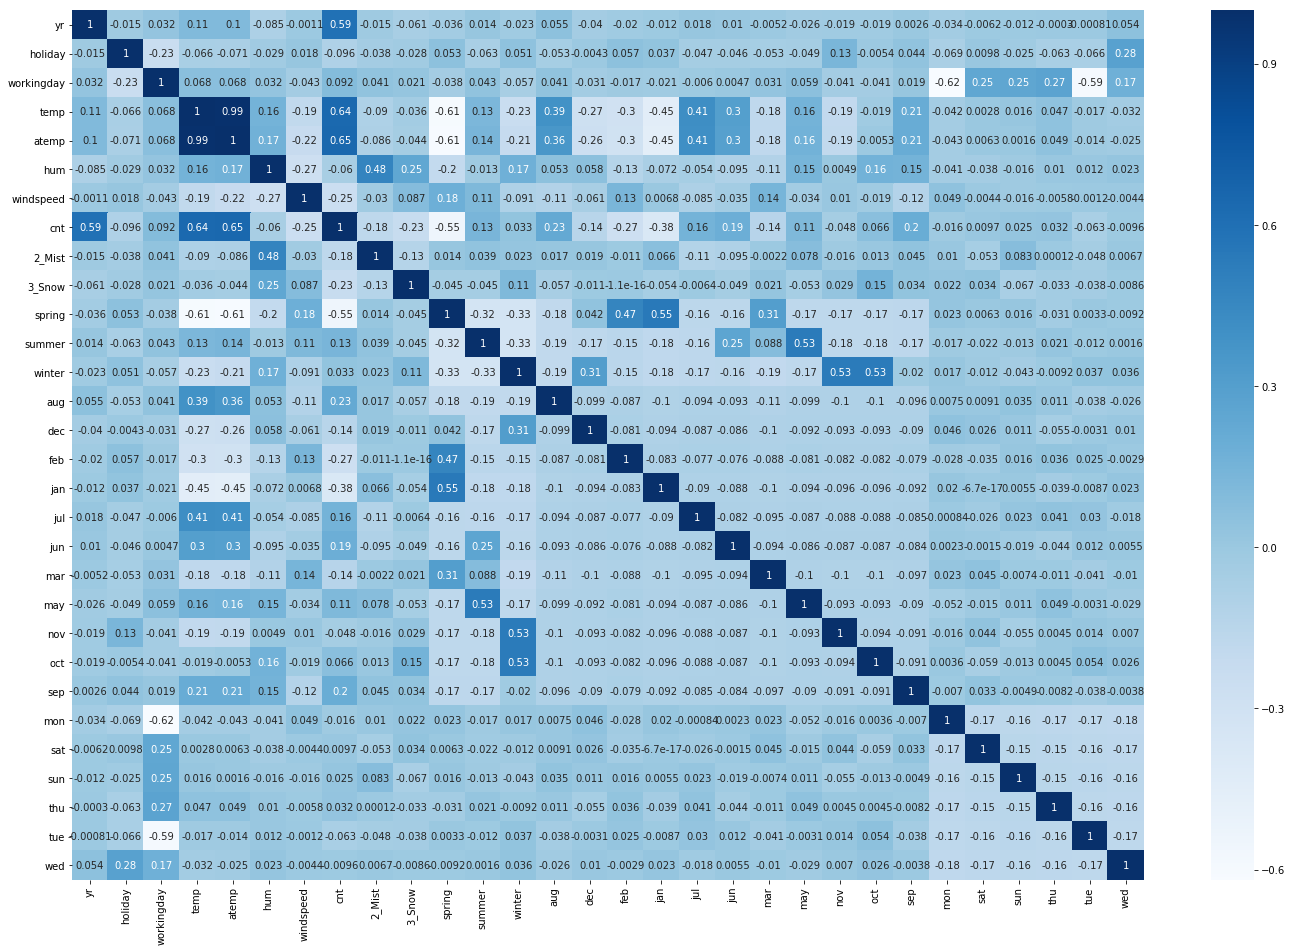

In [42]:
plt.figure(figsize = (24,16))
sns.heatmap(df_train.corr(), cmap="Blues", annot = True)
plt.show()

### Keeping the original training model intact

In [43]:
#For Model-1
df_train1 = df_train.copy()

#For Model-2
df_train2 = df_train.copy()

#For Model-1
df_test1 = df_test.copy()

#For Model-1
df_test2 = df_test.copy()

# Building a linear model with RFE to priritize variables

## Model-1: (With RFE 15 variables)

### Dividing into X and y variables for train dataset

In [44]:
y_train = df_train1.pop('cnt')
X_train = df_train1

#### Fitting the Linear Regression line

In [45]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('2_Mist', True, 1),
 ('3_Snow', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 11),
 ('mar', False, 14),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', False, 12),
 ('sun', False, 8),
 ('thu', False, 15),
 ('tue', False, 9),
 ('wed', False, 13)]

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', '2_Mist', '3_Snow', 'spring',
       'summer', 'winter', 'jan', 'jul', 'sep', 'mon'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'sat', 'sun', 'thu', 'tue',
       'wed'],
      dtype='object')

### Building Linear Regression for Model-1 using RFE

In [48]:
X_train_rfe = X_train[col]
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1206.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:34:41   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -962.2
Df Residuals:                     495   BIC:                            -898.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr             0.2357      0.008     28.268      0.000       0.219       0.252
holiday       -0.0367      0.028     -1.314      0.189      -0.092       0.018
workingday     0.0671      0.012      5.826      0.000       0.044       0.090
temp           0.6436      0.030     21.638      0.000       0.585       0.702
hum           -0.0207      0.033     -0.618      0.537      -0.086       0.045
windspeed     -0.1183      0.025     -4.802      0.000      -0.167      -0.070
2_Mist        -0.0731      0.011     -6.885      0.000      -0.094      -0.052
3_Snow        -0.2827      0.027    -10.569      0.000      -0.335      -0.230
spring         0.0310      0.018      1.748      0.081      -0.004       0.066
summer         0.0945      0.014      6.756      0.000       0.067       0.122
winter         0.1572      0.015     10.234      0.000       0.127       0.187
jan           -0.0147      0.018     -0.820      0.413      -0.050       0.021
jul           -0.0385      0.019     -2.050      0.041      -0.075      -0.002
sep            0.0950      0.017      5.559      0.000       0.061       0.129
mon            0.0789      0.015      5.376      0.000       0.050       0.108
==============================================================================
Omnibus:                       68.884   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.028
Skew:                          -0.738   Prob(JB):                     2.64e-33
Kurtosis:                       5.209   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other.

In [49]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
8,spring,4.53
10,winter,3.48
9,summer,2.84
6,2_Mist,2.29
0,yr,2.09
14,mon,1.98


#### <font color=green> Removing the column 'hum' because of high VIF and p-value

In [50]:
X = X.drop(['hum'], axis=1)

In [51]:
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          7.33e-189
Time:                        16:34:46   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.525      0.000       0.112       0.235
yr             0.2344      0.008     29.019      0.000       0.218       0.250
holiday       -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday     0.0465      0.012      3.983      0.000       0.024       0.069
temp           0.4728      0.034     14.037      0.000       0.407       0.539
windspeed     -0.1563      0.025     -6.292      0.000      -0.205      -0.107
2_Mist        -0.0826      0.009     -9.592      0.000      -0.100      -0.066
3_Snow        -0.2917      0.024    -12.027      0.000      -0.339      -0.244
spring        -0.0597      0.021     -2.861      0.004      -0.101      -0.019
summer         0.0434      0.015      2.890      0.004       0.014       0.073
winter         0.0797      0.017      4.650      0.000       0.046       0.113
jan           -0.0389      0.018     -2.215      0.027      -0.073      -0.004
jul           -0.0482      0.018     -2.635      0.009      -0.084      -0.012
sep            0.0753      0.017      4.522      0.000       0.043       0.108
mon            0.0584      0.015      3.980      0.000       0.030       0.087
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
7,spring,3.08
8,summer,2.33
0,yr,2.08
9,winter,1.99
13,mon,1.97
10,jan,1.62
11,jul,1.59


In [53]:
X = X.drop(['workingday'], axis=1)

In [54]:
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.21e-186
Time:                        16:34:49   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2121      0.030      6.986      0.000       0.152       0.272
yr             0.2346      0.008     28.628      0.000       0.219       0.251
holiday       -0.0939      0.026     -3.614      0.000      -0.145      -0.043
temp           0.4741      0.034     13.868      0.000       0.407       0.541
windspeed     -0.1570      0.025     -6.231      0.000      -0.207      -0.108
2_Mist        -0.0808      0.009     -9.256      0.000      -0.098      -0.064
3_Snow        -0.2869      0.025    -11.668      0.000      -0.335      -0.239
spring        -0.0613      0.021     -2.895      0.004      -0.103      -0.020
summer         0.0425      0.015      2.791      0.005       0.013       0.072
winter         0.0769      0.017      4.425      0.000       0.043       0.111
jan           -0.0383      0.018     -2.146      0.032      -0.073      -0.003
jul           -0.0512      0.019     -2.758      0.006      -0.088      -0.015
sep            0.0760      0.017      4.498      0.000       0.043       0.109
mon            0.0201      0.011      1.788      0.074      -0.002       0.042
==============================================================================
Omnibus:                       66.334   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.828
Skew:                          -0.715   Prob(JB):                     5.86e-32
Kurtosis:                       5.174   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.16
3,windspeed,4.64
6,spring,2.76
7,summer,2.23
0,yr,2.07
8,winter,1.80
9,jan,1.61
10,jul,1.59
4,2_Mist,1.56
11,sep,1.34


In [56]:
X = X.drop(['mon'], axis=1)

In [57]:
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          3.97e-187
Time:                        16:34:53   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2155      0.030      7.096      0.000       0.156       0.275
yr             0.2342      0.008     28.524      0.000       0.218       0.250
holiday       -0.0973      0.026     -3.747      0.000      -0.148      -0.046
temp           0.4728      0.034     13.803      0.000       0.405       0.540
windspeed     -0.1549      0.025     -6.140      0.000      -0.205      -0.105
2_Mist        -0.0807      0.009     -9.222      0.000      -0.098      -0.063
3_Snow        -0.2864      0.025    -11.623      0.000      -0.335      -0.238
spring        -0.0615      0.021     -2.898      0.004      -0.103      -0.020
summer         0.0422      0.015      2.766      0.006       0.012       0.072
winter         0.0771      0.017      4.424      0.000       0.043       0.111
jan           -0.0380      0.018     -2.125      0.034      -0.073      -0.003
jul           -0.0507      0.019     -2.728      0.007      -0.087      -0.014
sep            0.0762      0.017      4.500      0.000       0.043       0.110
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.130
Skew:                          -0.637   Prob(JB):                     2.75e-30
Kurtosis:                       5.187   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.61
6,spring,2.75
7,summer,2.22
0,yr,2.07
8,winter,1.79
9,jan,1.61
10,jul,1.59
4,2_Mist,1.56
11,sep,1.34


In [59]:
X = X.drop(['jan'], axis=1)

In [60]:
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          2.40e-187
Time:                        16:34:56   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.000       0.142       0.258
yr             0.2335      0.008     28.361      0.000       0.217       0.250
holiday       -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp           0.4915      0.033     14.798      0.000       0.426       0.557
windspeed     -0.1480      0.025     -5.893      0.000      -0.197      -0.099
2_Mist        -0.0816      0.009     -9.301      0.000      -0.099      -0.064
3_Snow        -0.2852      0.025    -11.536      0.000      -0.334      -0.237
spring        -0.0669      0.021     -3.167      0.002      -0.108      -0.025
summer         0.0453      0.015      2.971      0.003       0.015       0.075
winter         0.0831      0.017      4.818      0.000       0.049       0.117
jul           -0.0524      0.019     -2.811      0.005      -0.089      -0.016
sep            0.0767      0.017      4.511      0.000       0.043       0.110
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
7,summer,2.21
6,spring,2.08
0,yr,2.07
8,winter,1.79
9,jul,1.58
4,2_Mist,1.55
10,sep,1.34
5,3_Snow,1.08


In [62]:
X = X.drop(['jul'], axis=1)

In [63]:
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          7.36e-187
Time:                        16:34:59   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.030      6.456      0.000       0.133       0.249
yr             0.2341      0.008     28.246      0.000       0.218       0.250
holiday       -0.0969      0.026     -3.691      0.000      -0.148      -0.045
temp           0.4782      0.033     14.446      0.000       0.413       0.543
windspeed     -0.1482      0.025     -5.860      0.000      -0.198      -0.098
2_Mist        -0.0801      0.009     -9.090      0.000      -0.097      -0.063
3_Snow        -0.2860      0.025    -11.492      0.000      -0.335      -0.237
spring        -0.0551      0.021     -2.641      0.009      -0.096      -0.014
summer         0.0610      0.014      4.271      0.000       0.033       0.089
winter         0.0959      0.017      5.730      0.000       0.063       0.129
sep            0.0909      0.016      5.565      0.000       0.059       0.123
==============================================================================
Omnibus:                       63.599   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.759
Skew:                          -0.674   Prob(JB):                     6.07e-32
Kurtosis:                       5.225   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
6,spring,1.99
7,summer,1.89
8,winter,1.63
4,2_Mist,1.54
9,sep,1.23
5,3_Snow,1.08
1,holiday,1.04


### <font color=green> Model-1 summary:
    - Variables = 10 
    - R-squared = 0.833 
    - Adjusted R-squared = 0.830 
    - F-statistic = 249.2 
    - P-Values = 0.009 (max)
    - VIF less than 5

### Prediction and Residual Analysis of Model-1

In [65]:
y_train_pred = lr.predict(X_train_lm)

# residual analysis
res = y_train - y_train_pred

### Plotting Error Terms for Model-1

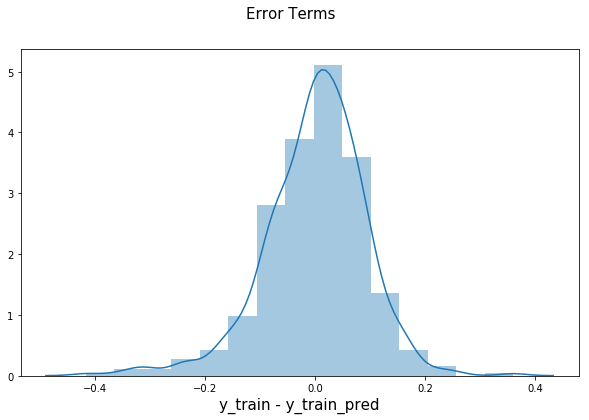

In [66]:
fig = plt.figure(figsize=(10, 6))
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

#### <font color=green> We can see the normal distribution of error plot.

### Making Predictions Using the Model-1

In [67]:
num_vars1 = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test1[num_vars1] = scaler.transform(df_test1[num_vars1])
df_test1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2_Mist,3_Snow,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [68]:
df_test1.shape

(219, 30)

### Dividing into X and y variables for test dataset

In [69]:
y_test = df_test1.pop('cnt')
X_test = df_test1

In [70]:
X_test_sm = sm.add_constant(X_test)

In [71]:
X_test_sm = X_test_sm.drop(['atemp', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'sat', 'sun', 'thu', 'tue', 'wed','hum', 'workingday', 'mon', 'jan', 'jul'], axis = 1)
X_test_sm.shape

(219, 11)

### y_pred for Model-1

In [72]:
y_test_pred = lr.predict(X_test_sm)

### r2_score for Model-1 test dataset

In [73]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8035441330582013

#### For the sake of comparision, lets bring r2_Score of train dataset

In [74]:
r2_score(y_true = y_train, y_pred = y_train_pred)

0.833170119099662

### <font color=green> For Model-1: r2_score for train set = 0.833 and r2_score for test set = 0.803.

### Model spread for Model-1

#### Test dataset

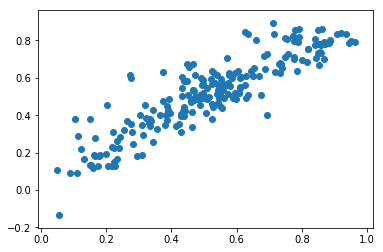

In [75]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
plt.show()

#### Train dataset

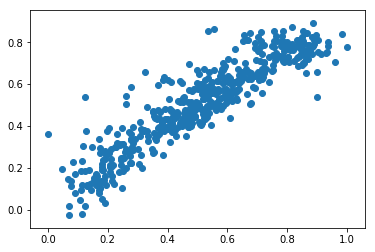

In [76]:
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
plt.show()

#### <font color=green> We can see that variables follow linear pattern.

## Model-2: (With RFE 10 variables)

### Dividing into X and y datasets for model-2 building

In [77]:
y_train = df_train2.pop('cnt')
X_train = df_train2

In [78]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('2_Mist', False, 2),
 ('3_Snow', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('aug', False, 12),
 ('dec', False, 8),
 ('feb', False, 9),
 ('jan', False, 6),
 ('jul', True, 1),
 ('jun', False, 16),
 ('mar', False, 19),
 ('may', False, 11),
 ('nov', False, 7),
 ('oct', False, 15),
 ('sep', True, 1),
 ('mon', False, 4),
 ('sat', False, 17),
 ('sun', False, 13),
 ('thu', False, 20),
 ('tue', False, 14),
 ('wed', False, 18)]

In [79]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', '3_Snow', 'spring', 'winter', 'jul', 'sep'], dtype='object')

In [80]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', '2_Mist', 'summer', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may',
       'nov', 'oct', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

### Building Linear Regression for Model-2 using RFE

In [81]:
X_train_rfe = X_train[col]
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1364.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:39:24   Log-Likelihood:                 423.77
No. Observations:                 510   AIC:                            -827.5
Df Residuals:                     500   BIC:                            -785.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr             0.2411      0.009     25.405      0.000       0.222       0.260
holiday       -0.0849      0.030     -2.818      0.005      -0.144      -0.026
temp           0.7266      0.029     24.821      0.000       0.669       0.784
hum           -0.0205      0.028     -0.744      0.457      -0.075       0.034
windspeed     -0.0337      0.026     -1.295      0.196      -0.085       0.017
3_Snow        -0.2508      0.029     -8.660      0.000      -0.308      -0.194
spring        -0.0011      0.015     -0.072      0.943      -0.030       0.028
winter         0.1246      0.013      9.376      0.000       0.098       0.151
jul           -0.0910      0.020     -4.513      0.000      -0.131      -0.051
sep            0.0499      0.018      2.739      0.006       0.014       0.086
==============================================================================
Omnibus:                       56.910   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.450
Skew:                          -0.724   Prob(JB):                     8.41e-21
Kurtosis:                       4.501   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
6,spring,2.40
0,yr,2.06
7,winter,1.98
8,jul,1.40
9,sep,1.20
5,3_Snow,1.11
1,holiday,1.04


In [83]:
X = X.drop(['hum'], axis=1)

In [84]:
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.33e-171
Time:                        16:39:27   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2042      0.025      8.095      0.000       0.155       0.254
yr             0.2350      0.009     26.233      0.000       0.217       0.253
holiday       -0.0862      0.028     -3.041      0.002      -0.142      -0.030
temp           0.4758      0.033     14.453      0.000       0.411       0.540
windspeed     -0.1325      0.027     -4.879      0.000      -0.186      -0.079
3_Snow        -0.2562      0.027     -9.608      0.000      -0.309      -0.204
spring        -0.1032      0.016     -6.274      0.000      -0.136      -0.071
winter         0.0504      0.013      3.754      0.000       0.024       0.077
jul           -0.0616      0.019     -3.272      0.001      -0.099      -0.025
sep            0.0498      0.017      2.911      0.004       0.016       0.083
==============================================================================
Omnibus:                       62.894   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.633
Skew:                          -0.736   Prob(JB):                     4.71e-26
Kurtosis:                       4.823   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
5,spring,1.61
6,winter,1.37
7,jul,1.34
8,sep,1.20
4,3_Snow,1.06
1,holiday,1.04


### <font color=green> Model-2 Summary:
    - Variables = 9 
    - R-squared = 0.805 
    - Adjusted R-squared = 0.801 
    - F-statistic = 228.8 
    - P-Values = 0.004 (max)
    - VIF less than 5

### Prediction and Residual Analysis of Model-2

In [86]:
y_train_pred = lr.predict(X_train_lm)

# residual analysis
res = y_train - y_train_pred

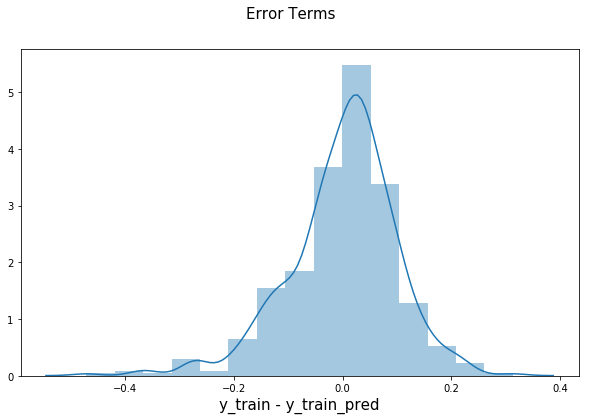

In [87]:
fig = plt.figure(figsize=(10, 6))
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

#### <font color=green> Error terms follows normal distribution

In [88]:
num_vars2 = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test2[num_vars2] = scaler.transform(df_test2[num_vars2])
df_test2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2_Mist,3_Snow,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [89]:
df_test2.shape

(219, 30)

### Dividing into X and y datasets for test dataset

In [90]:
y_test = df_test2.pop('cnt')
X_test = df_test2

In [91]:
X_test_sm = sm.add_constant(X_test)

In [92]:
X_test_sm = X_test_sm.drop(['workingday', 'atemp', '2_Mist', 'summer', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may','nov', 'oct', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'hum'], axis = 1)
X_test_sm.shape

(219, 10)

### y_pred for Model-2

In [93]:
y_test_pred = lr.predict(X_test_sm)

### r2_score for Model-2 test dataset

In [94]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7888115946045292

#### For the sake of comparision, lets bring r2_Score of train dataset

In [95]:
r2_score(y_true = y_train, y_pred = y_train_pred)

0.8046289610874561

### <font color=green> For Model-2: r2_score for train set = 0.804 and r2_score for test set = 0.788.

### Model spread for Model-2

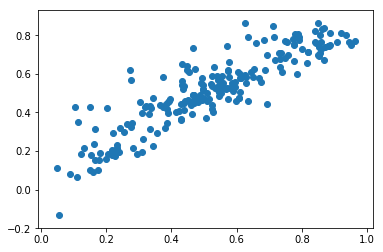

In [96]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
plt.show()

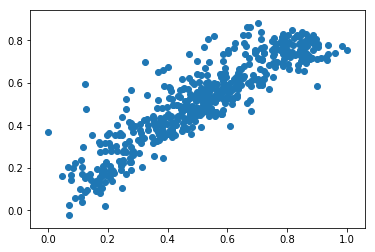

In [97]:
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
plt.show()

#### <font color=green> Variables follow linear pattern

# <font color=green> Inference:

## <font color=green> From both the models, we can see that R-squared, Adjusted R-squared, F-Statistic are better for Model-1 and p-value suggests significant model along with VIF suggesting no multicollinearity.

### <font color=green> Assumptions of Multiple Linear Regression

#### Linear Relationship: 
As we can see from the graph of Model spread, there exists a linear relationship between outcome variable and independent variables.
#### Multivariate Normality: 
Error terms are normally distributed as we can see from graph 'Error Terms'.
#### No Multicollinearity: 
As we can see from VIF of both Model-1 and Model-2, there exists to Multicollinearity between variables.
#### Homoscedasticity: 
The error terms seem Homoscedastic i.e; they are seemed to be having constant variance as we can see from both train and test data sets from both Model-1 and Model-2.

### Important Predictors

<font color=green> According to both Model-1 and Model-2, the top 3 features contributing for demand of shared bikes are: <br>
A.	Temp <br>
B.	Year <br>
C.	Snow <br>
    </font>

### Equation of best fit line (Model-1)

cnt = 0.191 + 0.2341 x yr - 0.0969 x holiday + 0.4782 x temp - 0.1482 x windspeed - 0.0801 x 2_Mist - 0.286 x 3_Snow - 0.0551 x spring + 0.061 x summer + 0.0959 x winter + 0.0909 x sep

Equation of best fit line (Model-2)

cnt = 0.2042 + 0.235 x yr - 0.0862 x holiday + 0.4758 x temp - 0.1325 x windspeed - 0.2562 x 3_Snow - 0.1032 x spring + 0.0504 x winter - 0.0616 x jul + 0.0498 x sep